In [10]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
import random
from sklearn.utils import shuffle

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt

## Data Preprocessing

In [11]:
# LOADING DATA
## Preparing 2007-2008 data
med_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/MCQ_E.XPT")                  # RA, GOUT
mental_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DPQ_E.XPT")               # PHQ
demo_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DEMO_E.XPT")                # GENDER, AGE, ETHNICITY, IPR 
body_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BMX_E.XPT")                 # BMI
blood_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BPX_E.XPT")                # BP
smoke_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SMQ_E.XPT")                # CIG100 (SMOKING)
sleep_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SLQ_E.XPT")                # SLEEPHOURS
diab_2007_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DIQ_E.XPT")                 # DIABETES

med_2007 = med_2007_full[["SEQN", "MCQ190", "MCQ160N"]].set_index('SEQN')
med_2007.columns = ["RA","GOUT"] # rename (RA = MCQ190, GOUT = MCQ160N)
med_2007.loc[:, ('RA')].replace(1.0, 5.0, inplace=True)  # RA is coded as 2 from 2011-2016 and as 1 in the 2009-2010 cohort # replce 1.0 with 5.0
demo_2007 = demo_2007_full[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "INDFMPIR"]].set_index('SEQN')
body_2007 = body_2007_full[["SEQN", "BMXBMI"]].set_index('SEQN')
mental_2007 = mental_2007_full.drop(columns=['DPQ100'])
mental_2007.set_index('SEQN',inplace=True)
blood_2007 = blood_2007_full[["SEQN", "BPXSY1"]].set_index('SEQN') # Only using first reading for Systolic BP
smoke_2007 = smoke_2007_full[["SEQN", "SMQ020"]].set_index('SEQN')
sleep_2007 = sleep_2007_full[["SEQN", "SLD010H"]].set_index('SEQN') 
sleep_2007.columns = ["SLEEPHOURS"] # rename (SLEEPHOURS = SLD010H)
diab_2007 = diab_2007_full[["SEQN", "DIQ010"]].set_index('SEQN')

radata2007 = med_2007.join(mental_2007).join(demo_2007).join(body_2007).join(blood_2007).join(sleep_2007).join(smoke_2007).join(diab_2007)

## Preparing 2009-2010 data
med_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/MCQ_F.XPT")                 # RA, GOUT
mental_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DPQ_F.XPT")              # PHQ
demo_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DEMO_F.XPT")               # GENDER, AGE, ETHNICITY, IPR 
body_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BMX_F.XPT")                # BMI
blood_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BPX_F.XPT")               # BP
smoke_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SMQ_F.XPT")               # CIG100 
sleep_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SLQ_F.XPT")               # SLEEPHOURS
diab_2009_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DIQ_F.XPT")                # DIABETES

med_2009 = med_2009_full[["SEQN", "MCQ191", "MCQ160N"]].set_index('SEQN')
med_2009.columns = ["RA","GOUT"] # rename(RA = MCQ191, GOUT = MCQ160N)
med_2009.loc[:, ('RA')].replace(1.0, 5.0, inplace=True)  # RA is coded as 2 from 2011-2016 and as 1 in the 2009-2010 cohort # replce 1.0 with 5.0
demo_2009 = demo_2009_full[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "INDFMPIR"]].set_index('SEQN')
body_2009 = body_2009_full[["SEQN", "BMXBMI"]].set_index('SEQN')
mental_2009 = mental_2009_full.drop(columns=['DPQ100'])
mental_2009.set_index('SEQN',inplace=True)
blood_2009 = blood_2009_full[["SEQN", "BPXSY1"]].set_index('SEQN') # Only using first reading for Systolic BP
smoke_2009 = smoke_2009_full[["SEQN", "SMQ020"]].set_index('SEQN')
sleep_2009 = sleep_2009_full[["SEQN", "SLD010H"]].set_index('SEQN')
sleep_2009.columns = ["SLEEPHOURS"] # rename (SLEEPHOURS = SLD010H)
diab_2009 = diab_2009_full[["SEQN", "DIQ010"]].set_index('SEQN')

radata2009 = med_2009.join(mental_2009).join(demo_2009).join(body_2009).join(blood_2009).join(sleep_2009).join(smoke_2009).join(diab_2009)

## Preparing 2011-2012 data
med_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/MCQ_G.XPT")                 # RA, GOUT
mental_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DPQ_G.XPT")              # PHQ
demo_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DEMO_G.XPT")               # GENDER, AGE, ETHNICITY, IPR 
body_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BMX_G.XPT")                # BMI
blood_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BPX_G.XPT")               # BP
smoke_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SMQ_G.XPT")               # CIG100 
sleep_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SLQ_G.XPT")               # SLEEPHOURS
diab_2011_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DIQ_G.XPT")                # DIABETES

med_2011 = med_2011_full[["SEQN", "MCQ195", "MCQ160N"]].set_index('SEQN')
med_2011.columns = ["RA","GOUT"] # rename(RA = MCQ195, GOUT = MCQ160N)
med_2011.loc[:, ('RA')].replace(2.0, 5.0, inplace=True)  # RA is coded as 2 from 2011-2016 and as 1 in the 2009-2010 cohort # replce 2.0 with 5.0
demo_2011 = demo_2011_full[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "INDFMPIR"]].set_index('SEQN')
body_2011 = body_2011_full[["SEQN", "BMXBMI"]].set_index('SEQN')
mental_2011 = mental_2011_full.drop(columns=['DPQ100'])
mental_2011.set_index('SEQN',inplace=True)
blood_2011 = blood_2011_full[["SEQN", "BPXSY1"]].set_index('SEQN') # Only using first reading for Systolic BP
smoke_2011 = smoke_2011_full[["SEQN", "SMQ020"]].set_index('SEQN')
sleep_2011 = sleep_2011_full[["SEQN", "SLD010H"]].set_index('SEQN')
sleep_2011.columns = ["SLEEPHOURS"] # rename (SLEEPHOURS = SLD010H)
diab_2011 = diab_2011_full[["SEQN", "DIQ010"]].set_index('SEQN')

radata2011 = med_2011.join(mental_2011).join(demo_2011).join(body_2011).join(blood_2011).join(sleep_2011).join(smoke_2011).join(diab_2011)

## Preparing 2013-2014 data
med_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/MCQ_H.XPT")                 # RA, GOUT
mental_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DPQ_H.XPT")              # PHQ
demo_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DEMO_H.XPT")               # GENDER, AGE, ETHNICITY, IPR 
body_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BMX_H.XPT")                # BMI
blood_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BPX_H.XPT")               # BP
smoke_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SMQ_H.XPT")               # CIG100 
sleep_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SLQ_H.XPT")               # SLEEPHOURS
diab_2013_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DIQ_H.XPT")                # DIABETES

med_2013 = med_2013_full[["SEQN", "MCQ195", "MCQ160N"]].set_index('SEQN')
med_2013.columns = ["RA","GOUT"] # rename(RA = MCQ195, GOUT = MCQ160N)
med_2013.loc[:, ('RA')].replace(2.0, 5.0, inplace=True)  # RA is coded as 2 from 2011-2016 and as 1 in the 2009-2010 cohort # replce 2.0 with 5.0
demo_2013 = demo_2013_full[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "INDFMPIR"]].set_index('SEQN')
body_2013 = body_2013_full[["SEQN", "BMXBMI"]].set_index('SEQN')
mental_2013 = mental_2013_full.drop(columns=['DPQ100'])
mental_2013.set_index('SEQN',inplace=True)
blood_2013 = blood_2013_full[["SEQN", "BPXSY1"]].set_index('SEQN')
smoke_2013 = smoke_2013_full[["SEQN", "SMQ020"]].set_index('SEQN')
sleep_2013 = sleep_2013_full[["SEQN", "SLD010H"]].set_index('SEQN')
sleep_2013.columns = ["SLEEPHOURS"] # rename (SLEEPHOURS = SLD010H)
diab_2013 = diab_2013_full[["SEQN", "DIQ010"]].set_index('SEQN')

radata2013 = med_2013.join(mental_2013).join(demo_2013).join(body_2013).join(blood_2013).join(sleep_2013).join(smoke_2013).join(diab_2013)

## Preparing 2015-2016 data
med_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/MCQ_I.XPT")                 # RA, GOUT
mental_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DPQ_I.XPT")              # PHQ
demo_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DEMO_I.XPT")               # GENDER, AGE, ETHNICITY, IPR 
body_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BMX_I.XPT")                # BMI
blood_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/BPX_I.XPT")               # BP
smoke_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SMQ_I.XPT")               # CIG100 
sleep_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/SLQ_I.XPT")               # SLEEPHOURS
diab_2015_full = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/RA final file/data/DIQ_I.XPT")                # DIABETES

med_2015 = med_2015_full[["SEQN", "MCQ195", "MCQ160N"]].set_index('SEQN')
med_2015.columns = ["RA","GOUT"] # rename(RA = MCQ195, GOUT = MCQ160N)
med_2015.loc[:, ('RA')].replace(2.0, 5.0, inplace=True)  # RA is coded as 2 from 2011-2016 and as 1 in the 2009-2010 cohort # replce 2.0 with 5.0
demo_2015 = demo_2015_full[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "INDFMPIR"]].set_index('SEQN')
body_2015 = body_2015_full[["SEQN", "BMXBMI"]].set_index('SEQN')
mental_2015 = mental_2015_full.drop(columns=['DPQ100'])
mental_2015.set_index('SEQN',inplace=True)
blood_2015 = blood_2015_full[["SEQN", "BPXSY1", "BPXSY2", "BPXSY3", "BPXSY4"]].set_index('SEQN') # Only using first reading for Systolic BP
smoke_2015 = smoke_2015_full[["SEQN", "SMQ020"]].set_index('SEQN')
sleep_2015 = sleep_2015_full[["SEQN", "SLD012"]].set_index('SEQN')
sleep_2015.columns = ["SLEEPHOURS"] # rename (SLEEPHOURS = SLD012)
sleep_2015['SLEEPHOURS'] = sleep_2015['SLEEPHOURS'].round() #  mutate(SLEEPHOURS = round(SLEEPHOURS, digits = 0))
diab_2015 = diab_2015_full[["SEQN", "DIQ010"]].set_index('SEQN')

radata2015 = med_2015.join(mental_2015).join(demo_2015).join(body_2015).join(blood_2015).join(sleep_2015).join(smoke_2015).join(diab_2015)

# radatafull <- bind_rows(radata2007, radata2009, radata2011, radata2013, radata2015)
radatafull = radata2007.append(radata2009).append(radata2011).append(radata2013).append(radata2015) # combine

# COMBINING AND CLEANING DATA

# STEP:
# 1) mean bp and drop
radatafull["BP"] = radatafull[["BPXSY1", "BPXSY2", "BPXSY3", "BPXSY4"]].mean(axis = 1, skipna = True) # get mean from 4 cols
radatafull = radatafull.drop(columns=["BPXSY1", "BPXSY2", "BPXSY3", "BPXSY4"])
radatafull.dropna(subset=['BP'], inplace=True)

# 2) drop na DPQ010:DPQ090, INDFMPIR, SLEEPHOURS
radatafull.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'INDFMPIR', 'SLEEPHOURS'], inplace=True)

# 3) remove DPQ with 7 or 9
for i in ['010','020','030','040','050','060','070','080','090']:
  radatafull = radatafull[radatafull['DPQ'+i] != 7.0]
  radatafull = radatafull[radatafull['DPQ'+i] != 9.0]

# 6) drop na BMXBMI
radatafull.dropna(subset=['BMXBMI'], inplace=True)

# 8) keep GOUT 1 or 2
radatafull = radatafull[(radatafull['GOUT'] == 1) | (radatafull['GOUT'] == 2)]

# 7) SLEEPHOURS remove 77 or 99
radatafull = radatafull[(radatafull['SLEEPHOURS'] != 77) & (radatafull['SLEEPHOURS'] != 99)]

# 9) keep DIQ010 1, 2 or 3
radatafull = radatafull[(radatafull['DIQ010'] == 1) | (radatafull['DIQ010'] == 2) | (radatafull['DIQ010'] == 3) | (radatafull['DIQ010'] == 9)]

# 12) SMQ020 remove 7, 9 none & change 2 > 1, 1 > 0
radatafull = radatafull[(radatafull['SMQ020'].notna()) & (radatafull['SMQ020'] != 7) & (radatafull['SMQ020'] != 9)]
radatafull['SMQ020'] = radatafull['SMQ020'].replace({1: 1, 2: 0})

# 4) keep > 17 years
radatafull = radatafull[(radatafull['RIDAGEYR'] > 17)]

# 10) SLEEPHOURS <= 12
radatafull = radatafull[(radatafull['SLEEPHOURS'] <= 12)]

# 5) keep RA na and 5
radatafull = radatafull[(radatafull['RA'].isnull()) | (radatafull['RA'] == 5)]

# 11) sum all DPQ010:DPQ090 and drop
radatafull["DPQ"] = radatafull[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']].sum(axis = 1, skipna = True)
radatafull = radatafull.drop(columns=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'])

# 13) DIQ010 1 > 1, other > 0
radatafull['DIQ010'] = radatafull['DIQ010'].replace({1: 1, 2: 0, 3: 0, 9: 0})

# 14) GOUT 1 > 1, other > 0
radatafull['GOUT'] = radatafull['GOUT'].replace({1: 1, 2: 0})

# 15) ROUND DPQ
radatafull = radatafull.round({'DPQ': 0})

# 16) RIAGENDR 1 > 1, other > 0
radatafull['RIAGENDR'] = radatafull['RIAGENDR'].replace({1: 1, 2: 0})

# SETNAME
# set null RA to 0 and 5 RA to 1
radatafull['RA'] = radatafull['RA'].fillna(value=0)
radatafull['RA'] = radatafull['RA'].replace(5, 1)

# Rename
'''
  SEQUENCENUMBER = SEQN, 
  BMI = BMXBMI,
  GENDER = RIAGENDR, 
  AGE = RIDAGEYR, 
  ETHNICITY = RIDRETH1,
  IPR = INDFMPIR,
  CIG100 = SMQ020,
  DIAB = DIQ010
  ETHNICITY, levels = c(1, 2, 3, 4, 5), labels = c('MA', 'OH', 'NH WHITE', 'NH BLACK', 'ONH')
  '''
  
radatafull.rename(columns={"BMXBMI": "BMI", "RIAGENDR": "GENDER", "RIDAGEYR": "AGE", "RIDRETH1": "ETHNICITY", "INDFMPIR": "IPR", "SMQ020": "CIG", "DIQ010": "DIAB", "DPQ": "PHQ"}, inplace=True)

eth = pd.DataFrame(LabelBinarizer().fit_transform(radatafull['ETHNICITY'])).rename(columns={0:'MA', 1:'OH', 2:'NH WHITE', 3:'NH BLACK', 4:'ONH'})
eth['SEQN'] = radatafull['ETHNICITY'].index
eth.set_index('SEQN', inplace=True)
radatafull = radatafull.join(eth)
radatafull = radatafull.drop(columns=['ETHNICITY'])
radatafull['GOUT'] = radatafull['GOUT'].astype(int)
radatafull['DIAB'] = radatafull['DIAB'].astype(int)
radatafull['RA'] = radatafull['RA'].astype(int)
radatafull['GENDER'] = radatafull['GENDER'].astype(int)
radatafull['CIG'] = radatafull['CIG'].astype(int)
radatafull['PHQ'] = radatafull['PHQ'].astype(int)
radatafull

,RA,GOUT,GENDER,AGE,IPR,BMI,SLEEPHOURS,CIG,DIAB,BP,PHQ,MA,OH,NH WHITE,NH BLACK,ONH
SEQN,,,,,,,,,,,,,,,,
41479.0,0,0,1,52.0,2.20,27.56,6.0,0,0,112.000000,0,1,0,0,0,0
41481.0,0,0,1,21.0,1.63,23.34,6.0,0,0,112.000000,2,0,0,0,1,0
41483.0,1,1,1,66.0,1.14,44.06,5.0,0,1,110.000000,0,0,0,0,1,0
41485.0,0,0,0,30.0,1.01,25.99,5.0,0,0,108.000000,3,0,1,0,0,0
41487.0,0,0,1,27.0,5.00,23.44,8.0,0,0,120.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93690.0,0,0,1,32.0,5.00,32.90,7.0,0,0,115.333333,0,0,1,0,0,0
93691.0,0,0,1,25.0,1.59,21.00,8.0,0,0,112.000000,0,0,0,0,0,1
93695.0,0,0,0,76.0,1.43,21.50,10.0,1,0,111.333333,1,0,0,1,0,0


## Forward Selection

In [12]:
rann = random.sample(range(1000), 100)

In [13]:
pwra = radatafull[(radatafull['RA'] == 1) & (radatafull['GENDER'] == 1)] # 423
pwora = radatafull[(radatafull['RA'] == 0) & (radatafull['GENDER'] == 1)]
radata = pwra.append(pwora)
radata

paras = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
addlist = []
  
for i in range(len(paras)): 

  xaixs = []
  res_test = []

  for para in paras:
    
    if para not in addlist:
          
      accu = []
      collist = addlist.copy()
      collist.append(para)
      xaixs.append(para)

      for ran in rann:
        
        pwra = radata[(radata['RA'] == 1)] # 423
        pwora = radata[(radata['RA'] == 0)].sample(n=423, random_state=ran)
        bdata = pwra.append(pwora)
        bdata = shuffle(bdata)

        X = bdata.loc[:, bdata.columns != 'RA']
        y = bdata.loc[:, bdata.columns == 'RA'].to_numpy().reshape((-1,))

        Xp = X[collist].to_numpy()

        k_fold = KFold(n_splits=10)

        for train_index, test_index in k_fold.split(Xp):

          X_train, X_test = Xp[train_index], Xp[test_index]
          y_train, y_test = y[train_index], y[test_index]

          model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

          fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
          accu.append(metrics.auc(fpr, tpr))

      res_test.append(sum(accu)/len(accu))

  if i == 0 :
    accut = [xaixs[res_test.index(max(res_test))]]
    accun = [max(res_test)]
    addlist = [xaixs[res_test.index(max(res_test))]]

  if i != 0:
    accut.append(xaixs[res_test.index(max(res_test))])
    accun.append(max(res_test))
    addlist.append(xaixs[res_test.index(max(res_test))])

maccut = accut
maccun = accun

In [14]:
pwra = radatafull[(radatafull['RA'] == 1) & (radatafull['GENDER'] == 0)] # 595
pwora = radatafull[(radatafull['RA'] == 0) & (radatafull['GENDER'] == 0)]
radata = pwra.append(pwora)
radata

paras = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
addlist = []
  
for i in range(len(paras)): 

  xaixs = []
  res_test = []

  for para in paras:
    
    if para not in addlist:
          
      accu = []
      collist = addlist.copy()
      collist.append(para)
      xaixs.append(para)

      for ran in rann:
        
        pwra = radata[(radata['RA'] == 1)] # 595
        pwora = radata[(radata['RA'] == 0)].sample(n=595, random_state=ran)
        bdata = pwra.append(pwora)
        bdata = shuffle(bdata)

        X = bdata.loc[:, bdata.columns != 'RA']
        y = bdata.loc[:, bdata.columns == 'RA'].to_numpy().reshape((-1,))

        Xp = X[collist].to_numpy()

        k_fold = KFold(n_splits=10)

        for train_index, test_index in k_fold.split(Xp):

          X_train, X_test = Xp[train_index], Xp[test_index]
          y_train, y_test = y[train_index], y[test_index]

          model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

          fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
          accu.append(metrics.auc(fpr, tpr))

      res_test.append(sum(accu)/len(accu))

  if i == 0 :
    accut = [xaixs[res_test.index(max(res_test))]]
    accun = [max(res_test)]
    addlist = [xaixs[res_test.index(max(res_test))]]

  if i != 0:
    accut.append(xaixs[res_test.index(max(res_test))])
    accun.append(max(res_test))
    addlist.append(xaixs[res_test.index(max(res_test))])

fmaccut = accut
fmaccun = accun

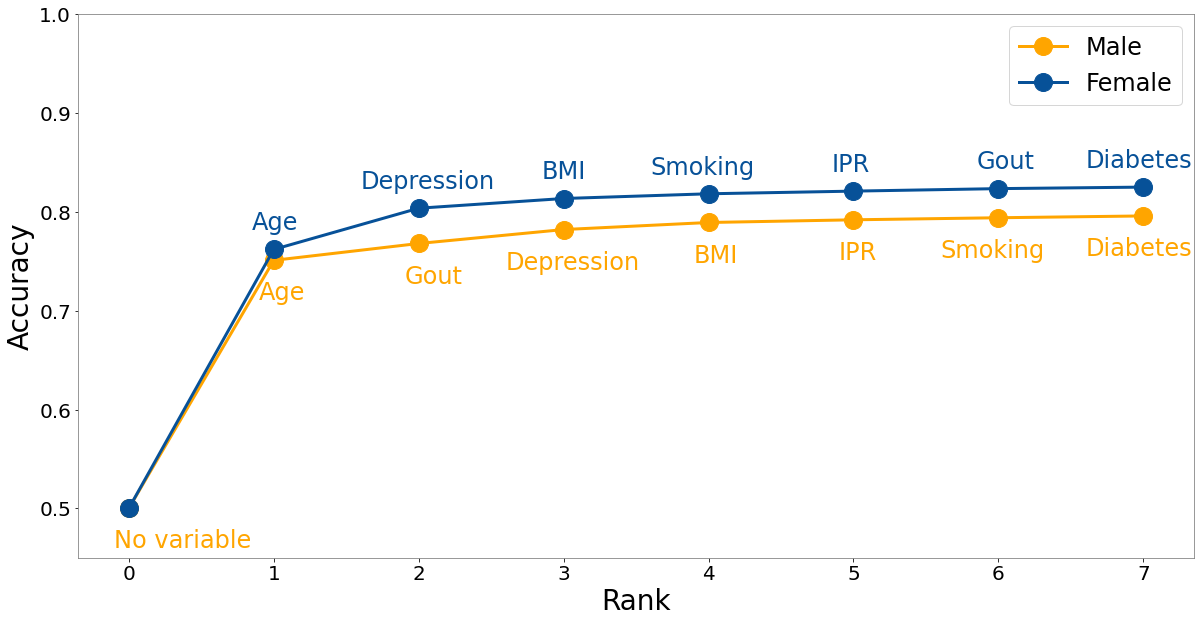

In [15]:
dict_var = {
    'AGE': 'Age',
    'PHQ': 'Depression',
    'BMI': 'BMI',
    'CIG': 'Smoking',
    'GOUT': 'Gout',
    'DIAB': 'Diabetes',
    'IPR': 'IPR',
    'All': 'All variable',
    'None': 'No variable'
}

plt.figure(figsize=(20,10))
plt.xlabel('Rank', fontsize=28)
plt.ylabel('Accuracy', fontsize=28)
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams["axes.edgecolor"] = "0.5"
plt.tick_params(labelsize=20, bottom='on', left='on')

maccut.insert(0, 'None')
maccun.insert(0, 0.5)

plt.plot([0,1,2,3,4,5,6,7], maccun, '-o', linewidth=3, label="Male", markersize=18, color='orange')
for i in range(len(maccut)):
    if (maccut[i] == 'PHQ') or (maccut[i] == 'DIAB') or (maccut[i] == 'CIG'):
      plt.text(i-0.4, maccun[i]-0.04, dict_var[maccut[i]], fontsize=24, color='orange')
    else:
      plt.text(i-0.1, maccun[i]-0.04, dict_var[maccut[i]], fontsize=24, color='orange')

fmaccut.insert(0, 'None')
fmaccun.insert(0, 0.5)

plt.plot([0,1,2,3,4,5,6,7], fmaccun, '-o', linewidth=3, label="Female", markersize=18, color='#075198')
# AGE, PHQ, GOUT, BMI, IPR, CIG, DIAB
for i in range(len(fmaccut)):
  if i != 0:
    if (fmaccut[i] == 'PHQ') or (fmaccut[i] == 'DIAB') or (fmaccut[i] == 'CIG'):
      plt.text(i-0.4, fmaccun[i]+0.02, dict_var[fmaccut[i]], fontsize=24, color='#075198')
    else:
      plt.text(i-0.15, fmaccun[i]+0.02, dict_var[fmaccut[i]], fontsize=24, color='#075198')

plt.ylim(0.45,1)
plt.legend(fontsize=24)
plt.savefig("test.svg", format="svg")
plt.show()


## Backward Elimination

In [16]:
pwra = radatafull[(radatafull['RA'] == 1) & (radatafull['GENDER'] == 1)] # 423
pwora = radatafull[(radatafull['RA'] == 0) & (radatafull['GENDER'] == 1)]
radata = pwra.append(pwora)
radata

paras = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
remainlist = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
  
for i in range(len(paras)):
  
  xaixs = []
  res_test = []
  
  for para in paras:
    
    if para in remainlist:
      
      accu = []
      collist = remainlist.copy()

      if i != 0:
        collist.remove(para)
      else :
        collist.remove(para)

      xaixs.append(para)

      for ran in rann:
        
        pwra = radata[(radata['RA'] == 1)] # 423
        pwora = radata[(radata['RA'] == 0)].sample(n=423, random_state=ran)
        bdata = pwra.append(pwora)
        bdata = shuffle(bdata)

        X = bdata.loc[:, bdata.columns != 'RA']
        y = bdata.loc[:, bdata.columns == 'RA'].to_numpy().reshape((-1,))

        Xp = X[collist].to_numpy()

        k_fold = KFold(n_splits=10)

        for train_index, test_index in k_fold.split(Xp):

          X_train, X_test = Xp[train_index], Xp[test_index]
          y_train, y_test = y[train_index], y[test_index]

          model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

          fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
          accu.append(metrics.auc(fpr, tpr))

      res_test.append(sum(accu)/len(accu))

  if i == 0 :
    accut = ['All']
    accun = [max(res_test)]

  if i != 0:
    accut.append(xaixs[res_test.index(max(res_test))])
    accun.append(max(res_test))
    remainlist.remove(xaixs[res_test.index(max(res_test))])

accut.append(remainlist[0])
accun.append(0.5)

maccut = accut
maccun = accun

In [17]:
pwra = radatafull[(radatafull['RA'] == 1) & (radatafull['GENDER'] == 0)] # 595
pwora = radatafull[(radatafull['RA'] == 0) & (radatafull['GENDER'] == 0)]
radata = pwra.append(pwora)
radata

paras = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
remainlist = ['BMI', 'DIAB', 'GOUT', 'IPR', 'CIG', 'PHQ', 'AGE']
  
for i in range(len(paras)):
  
  xaixs = []
  res_test = []
  
  for para in paras:
    
    if para in remainlist:
          
      accu = []
      collist = remainlist.copy()

      if i != 0:
        collist.remove(para)
      else :
        collist.remove(para)

      xaixs.append(para)

      for ran in rann:
        
        pwra = radata[(radata['RA'] == 1)] # 595
        pwora = radata[(radata['RA'] == 0)].sample(n=595, random_state=ran)
        bdata = pwra.append(pwora)
        bdata = shuffle(bdata)

        X = bdata.loc[:, bdata.columns != 'RA']
        y = bdata.loc[:, bdata.columns == 'RA'].to_numpy().reshape((-1,))

        Xp = X[collist].to_numpy()

        k_fold = KFold(n_splits=10)

        for train_index, test_index in k_fold.split(Xp):

          X_train, X_test = Xp[train_index], Xp[test_index]
          y_train, y_test = y[train_index], y[test_index]

          model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

          fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
          accu.append(metrics.auc(fpr, tpr))

      res_test.append(sum(accu)/len(accu))

  if i == 0 :
    accut = ['All']
    accun = [max(res_test)]

  if i != 0:
    accut.append(xaixs[res_test.index(max(res_test))])
    accun.append(max(res_test))
    remainlist.remove(xaixs[res_test.index(max(res_test))])

accut.append(remainlist[0])
accun.append(0.5)

fmaccut = accut
fmaccun = accun

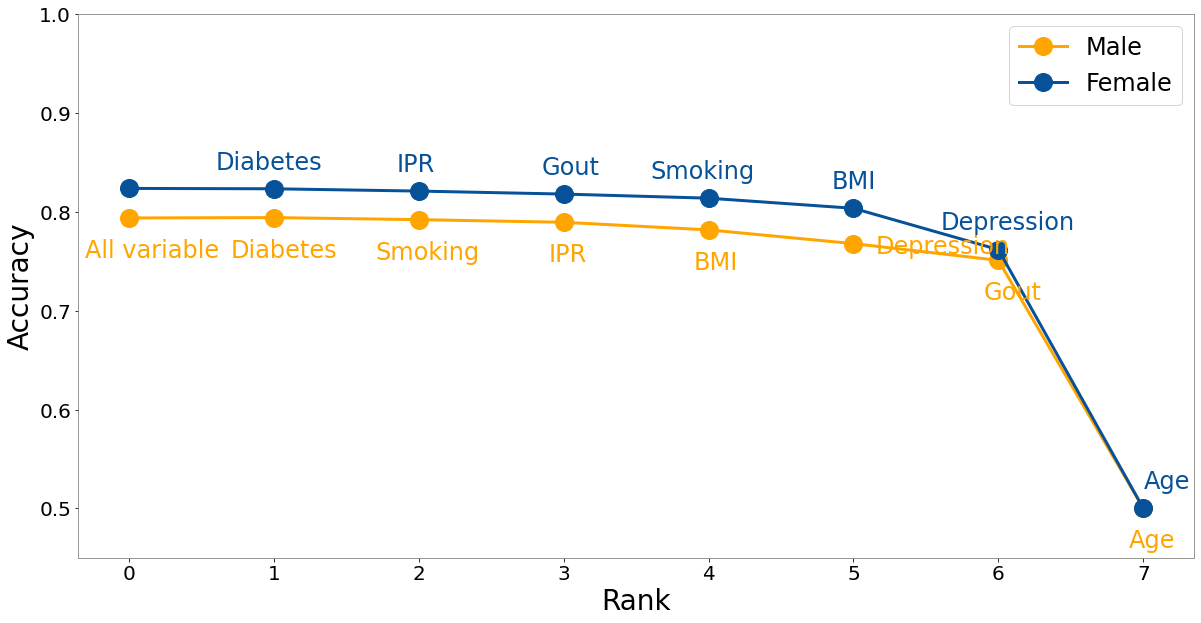

In [18]:
dict_var = {
    'AGE': 'Age',
    'PHQ': 'Depression',
    'BMI': 'BMI',
    'CIG': 'Smoking',
    'GOUT': 'Gout',
    'DIAB': 'Diabetes',
    'IPR': 'IPR',
    'All': 'All variable',
    'None': 'No variable'
}

plt.figure(figsize=(20,10))
plt.xlabel('Rank', fontsize=28)
plt.ylabel('Accuracy', fontsize=28)
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams["axes.edgecolor"] = "0.5"
plt.tick_params(labelsize=20, bottom='on', left='on')

plt.plot([0,1,2,3,4,5,6,7], maccun, '-o', linewidth=3, label="Male", markersize=18, color='orange')
for i in range(len(maccut)):
    if (maccut[i] == 'DIAB') or (maccut[i] == 'CIG'):
      plt.text(i-0.3, maccun[i]-0.04, dict_var[maccut[i]], fontsize=24, color='orange')
    elif i == 0:
      plt.text(i-0.3, maccun[i]-0.04, dict_var[maccut[i]], fontsize=24, color='orange')
    elif (maccut[i] == 'PHQ'):
      plt.text(i+0.15, maccun[i]-0.01, dict_var[maccut[i]], fontsize=24, color='orange')
    else:
      plt.text(i-0.1, maccun[i]-0.04, dict_var[maccut[i]], fontsize=24, color='orange')

plt.plot([0,1,2,3,4,5,6,7], fmaccun, '-o', linewidth=3, label="Female", markersize=18, color='#075198')
# AGE, PHQ, GOUT, BMI, IPR, CIG, DIAB
for i in range(len(fmaccut)):
  if i != 0:
    if (fmaccut[i] == 'PHQ') or (fmaccut[i] == 'DIAB') or (fmaccut[i] == 'CIG'):
      plt.text(i-0.4, fmaccun[i]+0.02, dict_var[fmaccut[i]], fontsize=24, color='#075198')
    elif (fmaccut[i] == 'AGE'):
      plt.text(i, fmaccun[i]+0.02, dict_var[fmaccut[i]], fontsize=24, color='#075198')
    else:
      plt.text(i-0.15, fmaccun[i]+0.02, dict_var[fmaccut[i]], fontsize=24, color='#075198')

plt.ylim(0.45,1)
plt.legend(fontsize=24)
plt.savefig("test.svg", format="svg")
plt.show()